# Ex01 - Aprendendo Numpy

1. Exercite o uso do Numpy, através de pequenos exemplos utilizando principalmente a criação de arrays. Testes conceitos vistos nos tutoriais, como: usando os índices de um array, índices negativos, índices bidimensionais, slicing, reshape, transposição. Aproveite para explorar os recursos de documentação do jupyter eexplique a medida que for realizando os diversos testes. Exemplo de uma sequência para o exercício:
    - crie um array
    - acesse elementos, linhas e colunas específicas do array, modificando seus valores
    - altere o tamanho do array
    - teste operações matriciais com arrays
       
2. Faça um programa para gerar uma imagem de um tabuleiro de xadrez. Existem várias formas de fazer este programa. Procure evitar o uso de laços explícitos e varreduras pixel-a-pixel.
3. Opcional: aumente o xadrez para visualizar o resultado. Veja no exemplo abaixo como visualizar um array.

### Visualizando arrays em forma de imagem

In [1]:
import numpy as np

f = np.ones((100,120))
print("Imagem constante:\n",f)

Imagem constante:
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


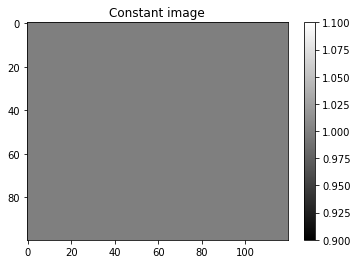

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Constant image')
plt.imshow(f,cmap='gray')
plt.colorbar()

# Resolução

## Parte 1

Vamos criar um array com elementos aleatórios,utilizando para isso **np.random.rand**. Em seguida, aplicaremos a propriedade **.reshape** para transformá-lo em um quadrado. A essa matriz, atribuiremos o nome **reshaped_array** :

In [3]:
random_array = np.random.rand(16)
print("random_array: \n\n",random_array, "\n")
print("Dimensões de random_array: ", random_array.shape, "\n")
reshaped_array = random_array.reshape(4,4)


print("Reshaped array: \n\n",reshaped_array, "\n")
print("Dimensões de reshaped_array: ", reshaped_array.shape, "\n")

random_array: 

 [0.54971512 0.6559461  0.03492716 0.76583144 0.13958244 0.96354674
 0.63052257 0.64179964 0.59651733 0.7652895  0.07855496 0.83468463
 0.35030045 0.91140937 0.98154053 0.08713402] 

Dimensões de random_array:  (16,) 

Reshaped array: 

 [[0.54971512 0.6559461  0.03492716 0.76583144]
 [0.13958244 0.96354674 0.63052257 0.64179964]
 [0.59651733 0.7652895  0.07855496 0.83468463]
 [0.35030045 0.91140937 0.98154053 0.08713402]] 

Dimensões de reshaped_array:  (4, 4) 




Ao utlizarmos **np.random.rand** foram gerados números entre 0 e 1. Iremos em seguida  multiplicar toda a matriz por 10, e em seguida tomar a parte inteira do resultado, obtendo assim **int_matrix**

Também é possível iremos obter a matriz transposta **t_matrix** com a propriedade **.T** :



In [4]:
matrix = 10*reshaped_array
int_matrix = np.rint(matrix) 

print("matrix: \n\n",matrix,"\n")
print("int_matrix: \n\n", int_matrix,"\n")


print("Matriz transposta: \n\n", int_matrix.T)

matrix: 

 [[5.4971512  6.55946095 0.34927159 7.6583144 ]
 [1.39582436 9.63546741 6.30522567 6.41799638]
 [5.96517328 7.65289498 0.78554964 8.34684633]
 [3.50300449 9.11409369 9.81540526 0.8713402 ]] 

int_matrix: 

 [[ 5.  7.  0.  8.]
 [ 1. 10.  6.  6.]
 [ 6.  8.  1.  8.]
 [ 4.  9. 10.  1.]] 

Matriz transposta: 

 [[ 5.  1.  6.  4.]
 [ 7. 10.  8.  9.]
 [ 0.  6.  1. 10.]
 [ 8.  6.  8.  1.]]


Podemos verificar se a matriz é ortogonal. Uma matriz ortogonal, quando multiplicada pela sua transposta, produz a matriz identidade. Sendo assim, façamos o produto das duas matrizes para verificar se elas são ortogonais:

In [26]:
print(int_matrix * int_matrix.T)

[[ 25.   7.   0.  32.]
 [  7. 100.  48.  54.]
 [  0.  48.   1.  80.]
 [ 32.  54.  80.   1.]]


Também podemos alterar elementos da matriz para que ela se torne triangular superior ou inferior, utilizando para isso o **slicing**:

In [25]:
print("Matriz original: \n\n",int_matrix, "\n")

tri_sup = int_matrix.copy()
tri_sup[1,:1] = 0
tri_sup[2,:2] = 0
tri_sup[3,:3] = 0
print("Matriz triangular superior: \n\n",tri_sup,"\n")

tri_inf = int_matrix.copy()
tri_inf[0,1:] = 0
tri_inf[1,2:] = 0
tri_inf[2,3:] = 0

print("Matriz triangular inferior: \n\n",tri_inf)



Matriz original: 

 [[ 5.  7.  0.  8.]
 [ 1. 10.  6.  6.]
 [ 6.  8.  1.  8.]
 [ 4.  9. 10.  1.]] 

Matriz triangular superior: 

 [[ 5.  7.  0.  8.]
 [ 0. 10.  6.  6.]
 [ 0.  0.  1.  8.]
 [ 0.  0.  0.  1.]] 

Matriz triangular inferior: 

 [[ 5.  0.  0.  0.]
 [ 1. 10.  0.  0.]
 [ 6.  8.  1.  0.]
 [ 4.  9. 10.  1.]]


## Parte 2

Incialmente, definiremos a função **print_xadrez**, que inicialmente irá criar uma matriz de zeros com dimensões L x C, populando-a com uns alternadamente para criar o efeito quadriculado. Além disso, é feito uso da biblioteca **matplotlib** para realizar a exibição das imagens.

In [73]:
def print_xadrez(L,C):
    
    #criação de um quadrado de dimensões L x C contendo zeros
    quad = np.zeros(L*C).reshape(L,C) 
    
    #preenchendo determinados elementos com uns para fazer o quadriculado
    quad[::2,::2] = 1   #começando da primeira linha e pulando de duas em duas colunas
    quad[1::2,1::2] = 1 #começando da segunda linha e pulando de duas em duas colunas
    
    print('Tabuleiro de Xadrez com dimensões : ' + str(L) + 'x' + str(C) + "\n\n", quad, "\n")
    
    plt.figure()
    plt.title('Tabuleiro de Xadrez com dimensões : ' + str(L) + 'x' + str(C))
    plt.imshow(quad,cmap='gray')
    plt.colorbar()



    

Assim, fazemos a chamada da função para obter um tabuleiro de dimensões 8x8:

Tabuleiro de Xadrez com dimensões : 8x8

 [[1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]] 



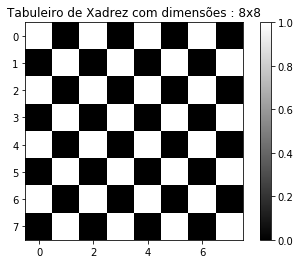

In [74]:
print_xadrez(8,8)

## Parte 3

Em seguida, fazemos outros experimentos com diferentes dimensões:

Tabuleiro de Xadrez com dimensões : 16x16

 [[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]] 

Tabuleiro de Xadrez com dimensões : 32x32

 [[1. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 0. 1. 0.]
 ...
 [0. 1. 0. ..

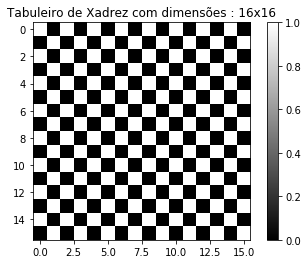

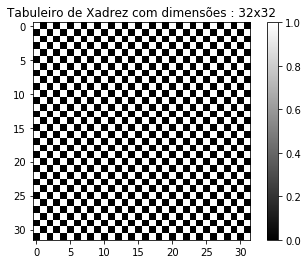

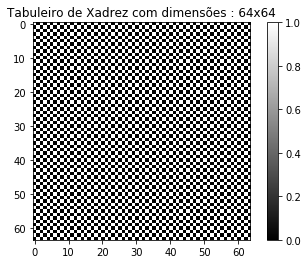

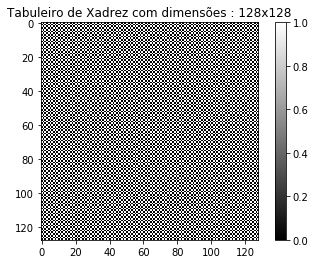

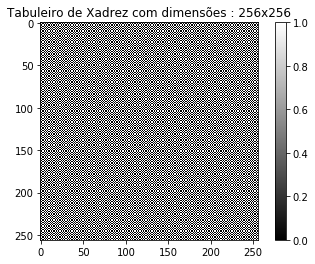

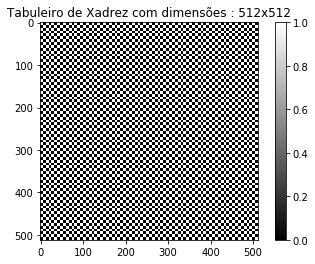

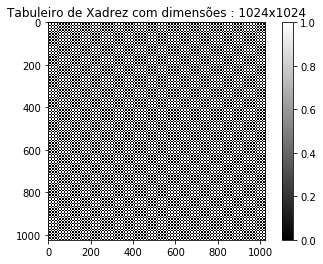

In [75]:

print_xadrez(16,16)
print_xadrez(32,32)
print_xadrez(64,64)
print_xadrez(128,128)
print_xadrez(256,256)
print_xadrez(512,512)
print_xadrez(1024,1024)


Comparando-se as figuras, nota-se que o quadriculado torna-se menos nítido com o aumento do número de elementos da matriz. Isso se deve ao fato de que cada quadrado do tabuleiro de xadrez é formado por um único elemento nesta implementação. 